In [1]:
# Loading relevant libraries. 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
def roundl(lst):
    """
    A function that takes in a list of floats and rounds the number according to a pre-specified digit. 
    """
    temp = []
    decimal = 4
    for i in range(len(lst)):
        temp.append(round(lst[i], decimal))
    return temp

In [3]:
"""
Note: I did not upload the actual .csv file because although the data is anonymized, people can use combinations 
of fields (e.g. whether a respondent is an international student/first-generation low-income (FGLI); which class year;
etc.) to pinpoint the identity of some respondents. 
""" 

# Modify the filename once you have a .csv file corresponding to the survey.
filename = "mock_surveydata.csv"
survey_df = pd.read_csv("phoenix_survey.csv", encoding ='unicode_escape')

In [ ]:
# Checking whether the data is loaded successfully. 
survey_df

In [ ]:
# Initializing demographic questions.
classyear = "What is your class year? "
intl = "Are you an international student?"
fgli = "Do you identify as a first generation or low-income  (FGLI) student ? "
finaid = "Do you receive need-based financial aid?"
disable = "Do you have any disabilities or vulnerabilities (mental, physical, etc.) that weigh on your preference for Fall 2020 format?"
s20_housing = "Did you have stable and sufficient housing in Spring 2020 (after spring break)?"
house_confidence = "If Swarthmore did NOT offer guaranteed student housing throughout the entire Fall 2020, are you confident that you would have a stable and sufficient housing situation? "
f20_prefer = "Which fall 2020 format do you prefer, given the circumstances of COVID-19? (Assuming these were the only options, though there are many possibilities)"


In [7]:
# PART 1: Preliminary data analysis.
"""
Purpose: Shed light on whether some demographics respond differently on questions regarding Fall 2020 format 
preference and their likelihood of absence given each format. 

For instance, I found out that:

1.) First-year students tend to prefer on-campus options (hybrid or on-campus), whereas juniors and seniors are more 
likely to prefer a virtual option.
2.) Most respondents will not take a leave of absence if Fall 2020 is on-campus or hybrid. Moreover, there is no 
meaningful difference in response on either on-campus or hybrid Fall 2020 between those who are/aren't FGLI; are/aren't
international students, and so on. 
3.) One-third of surveyed students report they "are likely or definitely will" take a leave of absence if 
Fall 2020 is online. When I delved into responses for each demographic, many interesting trends showed up, such as 
international students are much less likely to take a leave of absence EVEN IF Fall 2020 is online. 

Identifying these trends early on helps decide which graphics are meaningful and should be included in the article. 
"""

dem_question = "What is your class year? "
dem_response = "Incoming First-year"
pref_question = "If Fall 2020 is conducted fully online, how likely is it that you will take a leave of absence? "

# Creating the list of how many students in each demographic respond to each question. 
response_index = survey_df[survey_df[dem_question] == dem_response][pref_question].value_counts().index.tolist()
response_num = survey_df[survey_df[dem_question] == dem_response][pref_question].value_counts().tolist()

# Plotting pie chart to better see the trend. 
fig, ax = plt.subplots()
ax.pie(response_num, labels = response_index, autopct = '%1.1f%%')
ax.axis('equal')
ax.set_title('TBD')
plt.show()

In [45]:
# PART 2: Creating dataframe for visualization. 

def create_csvpref(survey_df, dem_question, pref_question, norm): 
    """
    Purpose: Create a dataframe showing how many students in each demographics (input = demographic questions)
    prefer some options (input = preference, such as preferred format for Fall 2020).
    
    @survey_df = A dataframe corresponding to the .csv file downloaded from Google Doc.
    @dem_question = The demographics of interest (Remember: Our goal is to determine whether students in 
    certain demographics respond differently to some questions).
    @pref_question = Preference of interest.
    @norm = A Boolean variable indicating whether we want to normalize the data.
    
    NOTE: This function removes responses from students who have already graduated as too few of them responded,
    making any extrapolation infeasible. 
    """
    
    # Creating a list of demographic types. 
    dem_type = survey_df[dem_question].value_counts().index.tolist()

    # Cleaning the data: Remove responses from students who have graduated.
    if dem_question == "What is your class year? ":
        dem_type = dem_type[:4] 

    # Cleaning the data: Remove responses from students answering "Others" in the disability question.
    # I did so because this function is used to create a compact summary table. 
    ignore_q = "Do you have any disabilities or vulnerabilities (mental, physical, etc.) that weigh on"
    ignore_q += " your preference for Fall 2020 format?" 
    if dem_question == ignore_q:
        dem_type = dem_type[:3]
        
    # Creating a list of options on each preference question. 
    pref_type = survey_df[pref_question].value_counts().index.tolist()
         
    # Creating a dataframe as described above and fill in the value. 
    new_df = pd.DataFrame(columns = pref_type, index = dem_type)

    for pref in new_df.columns.tolist():
        for dem in new_df.index.tolist():
            try: 
                dem_pref_val = survey_df[survey_df[dem_question] == dem][pref_question].value_counts(normalize = norm)[pref]
            except:
                print("Error when %s,%s"%(pref,dem))
            # Note: .loc access index/row (demographic) firt and then column (preference).
            new_df.loc[dem, pref] = dem_pref_val
    
    return new_df

In [ ]:
# PART 3: Checking the results from PART 2. 
"""
The table from PART 2 shows several interesting results — such as the more financially dependent a student is 
(i.e. their tuition is mostly funded by a financial aid), the less likely one will take a leave of absence. However,
this trend does not hold for students receiving little to no financial aid; that is, the least finanically dependent
students are also the least likely to take a leave of absence. Why is that? 
"""
temp_df[finaid].value_counts()

In [34]:
# PART 3.1: Interesting results
"""
1. The majority of international students fall into the little-to-no financial aid category, AND they 
overwhelmingly prefer NOT to take a leave of absence. This can be attributed to visa concerns (i.e. will their 
visa be terminated if their education is discontinued).
2. Once we remove international students from the survey, the trend holds at all levels. 

This shows that the leave of absence has a financial aspect.
"""

unlikely_absence = "Will not or highly unlikely"
temp_df = survey_df[survey_df[intl] == "Yes"]
temp_df = temp_df[(temp_df[finaid] == "No, I do not receive any financial aid") & (temp_df[fully_online] == unlikely_absence)]

temp_df.shape[0]

,Timestamp,Score,What is your class year?,Your prospective major(s) is (are) in ... division (check all that apply).,Are you an international student?,Do you identify as a first generation or low-income (FGLI) student ?,Do you receive need-based financial aid?,"Do you have any disabilities or vulnerabilities (mental, physical, etc.) that weigh on your preference for Fall 2020 format?",Did you have stable and sufficient housing in Spring 2020 (after spring break)?,"If Swarthmore did NOT offer guaranteed student housing throughout the entire Fall 2020, are you confident that you would have a stable and sufficient housing situation?",...,Access to resources / accommodations,"Post-graduation opportunities (e.g. employments, fellowships, graduate schools, etc.)",Travel Restrictions / Timezone difference,Housing Security,Concerns on supporting family / community members,Others (please specify),"If you're comfortable, tell us a little about your circumstances and how the decision about Fall 2020 will affect you personally. ******ADD YOUR NAME TO THIS SECTION if it's okay for us to contact you and/or use your response ANONYMOUSLY OR OTHERWISE (this DOES NOT mean you are consenting to be quoted by name; we will ask before putting any names or quotes in the article). You can also reach out anonymously or otherwise to editor@swarthmorephoenix.com.","If you have any other thoughts or comments about the format of Fall 2020, please share them below.",Email Address,"If we can contact you with questions (again, this is not consent for us to associate any response with your name, just for further questions) please LEAVE YOUR NAME here."
16,6/22/2020 22:53:28,NaN,Rising Junior,"STEM (Science, technology, engineering, math),...",Yes,No,"No, I do not receive any financial aid",No,Yes,Yes,...,3.0,5.0,1.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN
17,6/22/2020 22:53:39,NaN,Rising Junior,"STEM (Science, technology, engineering, math)",Yes,No,"No, I do not receive any financial aid",No,Yes,No,...,4.0,5.0,5.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN
50,6/22/2020 23:46:03,NaN,Rising Senior,Social Sciences,Yes,No,"No, I do not receive any financial aid",No,Yes,Yes,...,4.0,3.0,5.0,5.0,5.0,NaN,"i donât live in the us, and was studying abr...",i was really shocked and disappointed to see t...,NaN,NaN
83,6/23/2020 1:55:42,NaN,Rising Sophomore,Social Sciences,Yes,No,"No, I do not receive any financial aid",No,Yes,Yes,...,4.0,4.0,5.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN
158,6/23/2020 13:24:06,NaN,Rising Senior,"STEM (Science, technology, engineering, math)",Yes,Prefer not to answer,"No, I do not receive any financial aid",Yes,Yes,Yes,...,5.0,5.0,5.0,5.0,5.0,NaN,I'm a rising senior from China. I will enroll ...,NaN,NaN,Ercong Luo
201,6/23/2020 21:34:05,NaN,Rising Sophomore,"STEM (Science, technology, engineering, math),...",Yes,No,"No, I do not receive any financial aid",No,Yes,Yes,...,5.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
220,6/24/2020 10:39:14,NaN,Rising Senior,"STEM (Science, technology, engineering, math)",Yes,No,"No, I do not receive any financial aid",No,Yes,Yes,...,3.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN
228,6/24/2020 16:20:54,NaN,Rising Senior,Social Sciences,Yes,No,"No, I do not receive any financial aid",No,Yes,Yes,...,3.0,5.0,5.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN
244,6/25/2020 7:22:22,NaN,Rising Junior,"STEM (Science, technology, engineering, math)",Yes,No,"No, I do not receive any financial aid",No,Yes,Yes,...,2.0,1.0,3.0,3.0,1.0,I learn better in person.,NaN,NaN,NaN,NaN
251,6/25/2020 11:08:15,NaN,Already graduated,Social Sciences,Yes,No,"No, I do not receive any financial aid",Prefer not to answer,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_df = create_csvpref(survey_df, dem_question, pref_question, True)

In [ ]:
# PART 3.2: Cross-checking new_df with the individual values in the CELL below; experimented with whether 
# it makes sense to present the responses as a raw file or a normalized file. 
dem_question = classyear
pref_question = pref_format

result_csv1 = create_csvpref(survey_df, dem_question, pref_question, False)
result_csv1

In [ ]:
# PART 3.3.: Saving the results once everything is checked. 
name = "classyear_formatpref"
result_csv1.to_csv(name + ".csv")

In [13]:
# PART 3.4: Attempted to visualize normalized dataframe on demographics and preference using Python. 

#https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py
def survey(results, category_names, filename):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            # Modifying the text
            ax.text(x, y, str(round(float(c) * 100, 2)) + "%", ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    # Adding the line to save plot graph
    plt.savefig(filename)
    print("%s saved." %(filename))
    
    return fig, ax

financial_aid.png saved.


(<Figure size 864x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c21a41dd8>)

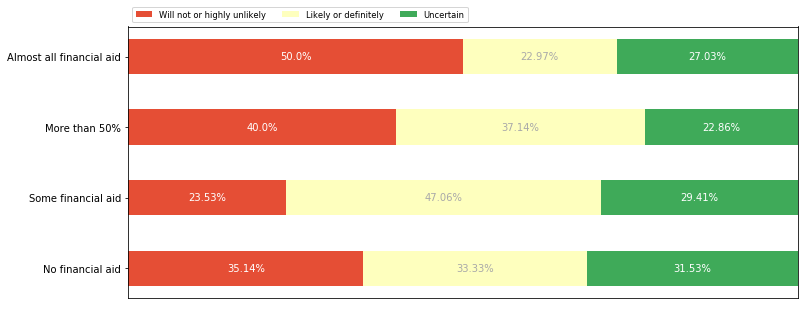

In [15]:
# PART 3.4 (continued)
pref_type = new_df.columns.tolist()

results = {}

# Examples of changing the labels
results["Almost all financial aid"] = roundl(new_df.loc["Yes, all or almost all expenses paid"].tolist())
results["More than 50%"] = roundl(new_df.loc["Yes, more than 50% of expenses paid"].tolist())
results["Some financial aid"] = roundl(new_df.loc["Yes, some financial aid (around or less than 50%)"].tolist())
results["No financial aid"] = roundl(new_df.loc["No, I do not receive any financial aid"].tolist())


survey(results, pref_type, "financial_aid.png")

In [52]:
# PART 4: Breakdown of factors that matter

def create_csvfactor(survey_df, dem_question, normalize):
    """
    Purpose: Creating a dataframe that breakdowns what students in each demographic report as "greatly matter" 
    for their Fall 2020 consideration.
    
    Parameter: 
    @survey_df = A .csv dataframe we downloaded directly from Google Spreadsheet.
    @dem_question = The demographics we wish to find what they care about. 
    @normalize = A Boolean variable indicating whether we want to normalize or not. This helps with confirming 
    basic assumptions, such as international students caring more about travel and timezone restriction. 
    """
    # List of responses for demographic questions
    dem_type = survey_df[dem_question].value_counts().index.tolist()
    
    disability_q =  "Do you have any disabilities or vulnerabilities (mental, physical, etc.) that weigh on your preference for Fall 2020 format?"
    
    # Cleaning already graduated case 
    if dem_question == "What is your class year? ":
        print("Dropping Other responses class year")
        dem_type = dem_type[:4] # To exclude the person who has gradauted.
    elif dem_question == disability_q: 
        print("Dropping Other responses in disability")
        dem_type = dem_type[:3]

    factor_lst = survey_df.columns.tolist()[14:28] # Excluding Others (please specify)

    # Initialize new dataframe with empty values. 
    dem_factor_df = pd.DataFrame(index = dem_type, columns = factor_lst)
    
    # Narrow down a dataframe such that indices are demographic types AND columns are 15 factors. 
    temp_df = survey_df[[dem_question] + factor_lst]

    # Filling in data by counting which factors each demographic cares about (answers 4-5). 
    error_count = 0
    
    for dem in dem_factor_df.index.tolist():
        
        # Obtaining the number of students within each sub-demographics. 
        num_dem = survey_df[survey_df[dem_question] == dem].shape[0]
        
        # Counting care numbers. 
        for factor in dem_factor_df.columns.tolist():
            try:
                num_care = temp_df[temp_df[dem_question] == dem][factor].value_counts()[4]
                num_care += temp_df[temp_df[dem_question] == dem][factor].value_counts()[5]
            except:
                error_count += 1
                print("Error found: %s on %s" %(dem, factor))
            
            if(normalize):
                dem_factor_df.loc[dem,factor] = round(num_care/num_dem, 2)
            else:
                dem_factor_df.loc[dem,factor] = num_care
    print("Total error = %d" %(error_count))
    
    return dem_factor_df

In [54]:
# Checking the normalized breakdown of factors for each demographics to be reported in the article.
dem_factor_df_norm = create_csvfactor(survey_df, intl, True)
dem_factor_df_norm

Total error = 0


,Financial constraints,Social Equity,Academic Equity,Academic Rigor,Social Experiences / Networking Opportunities,Timely graduation,Extracurricular opportunities,Athletic Experiences,Health concerns,Access to resources / accommodations,"Post-graduation opportunities (e.g. employments, fellowships, graduate schools, etc.)",Travel Restrictions / Timezone difference,Housing Security,Concerns on supporting family / community members
No,0.44,0.64,0.76,0.53,0.72,0.59,0.62,0.29,0.57,0.69,0.67,0.27,0.4,0.39
Yes,0.5,0.53,0.75,0.72,0.75,0.75,0.59,0.12,0.56,0.62,0.69,0.78,0.5,0.47


In [204]:
# Saving files after cross-comparison. 
dem_factor_df_norm.to_csv("finaid_carefactor_norm.csv")

In [203]:
# Checking the raw breakdown. 
# NOTE: At first, I planned to create a stacked bar chart, but I realized that the graphics will be too complicated
# yet does not contribute much to the understanding of the story. Hence, I ended up using this breakdown for 
# basic report rather than full-scale visualization. 
dem_factor_df_raw = create_csvfactor(survey_df, finaid, False)
dem_factor_df_raw

Total error = 0


,Financial constraints,Social Equity,Academic Equity,Academic Rigor,Social Experiences / Networking Opportunities,Timely graduation,Extracurricular opportunities,Athletic Experiences,Health concerns,Access to resources / accommodations,"Post-graduation opportunities (e.g. employments, fellowships, graduate schools, etc.)",Travel Restrictions / Timezone difference,Housing Security,Concerns on supporting family / community members
"No, I do not receive any financial aid",13,62,78,71,86,67,72,35,55,75,78,31,34,40
"Yes, all or almost all expenses paid",64,56,61,35,47,51,42,11,49,50,51,33,46,37
"Yes, more than 50% of expenses paid",21,21,25,19,26,19,23,13,22,21,24,12,17,14
"Yes, some financial aid (around or less than 50%)",15,20,29,16,25,19,19,9,18,27,18,10,7,10


In [146]:
# Testing some factors manually to see if the result in dem_factor_df is accurate. 
factor = "Timely graduation "
temp_df[temp_df[dem_question] == "Yes"][factor].value_counts()

5.0    41
4.0    15
3.0    11
2.0     9
1.0     5
Name: Timely graduation , dtype: int64

In [147]:
# Saving into csv
dem_factor_df.to_csv("fgli_carefactor.csv")